# Beer Advocate Reviews Dataset Analysis

This data set can be downloaded from the following site: https://data.world/petergensler/beer-advocate-reviews.

## Data Preprocessing

Import all the required libraries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') 
import seaborn as sns

Read csv data file in a dataframe. Check dataframe size and values in columns.

In [2]:
df = pd.read_csv('BeerAdvocate-000.csv', sep=',')

In [3]:
df.shape

(528870, 13)

In [4]:
df.head()

,﻿beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_profileName,review_taste,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [5]:
df.describe()

C:\Users\Ajay\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,﻿beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,NaN,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,NaN,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,NaN,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


We can see that beer_ABV column contains invalid values, which we need to handle.

Check for data types of all the columns. 

In [6]:
df.dtypes

﻿beer_ABV             float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_aroma          float64
review_overall        float64
review_palate         float64
review_profileName     object
review_taste          float64
review_text            object
review_time             int64
dtype: object

Count NA values in each column.

In [7]:
len(df) - df.count()

﻿beer_ABV             20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_aroma              0
review_overall            0
review_palate             0
review_profileName      115
review_taste              0
review_text             119
review_time               0
dtype: int64

The column beer_ABV contains 20280 nan values. We can either drop these records or fill them with appropriate values. <br> Droping the records will change number of reviews which may be useful for further analysis. So, we can use 0 to fill for ABV% as these values are not recorded for several beers. <br>For review profile name and text with na values, we fill it with 'Unspecified'.

Reassign column names as beer_ABV was not accesible

In [8]:
df.columns = ['beer_ABV','beer_beerId','beer_brewerId','beer_name','beer_style','review_appearance','review_aroma','review_overall','review_palate','review_profileName','review_taste','review_text','review_time']

In [9]:
df.beer_ABV.fillna(0, inplace = True)
df.review_text.fillna('Unspecified', inplace = True)
df.review_profileName.fillna('Unspecified', inplace = True)

Convert integer epoch times to Timestamp for further analysis.

In [10]:
df.review_time = pd.to_datetime(df.review_time, unit = 's', errors='raise')

In [11]:
df.head(3)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_profileName,review_taste,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04


In [12]:
df.shape

(528870, 13)

***

## 1. Which brewery produces the strongest beers by ABV%?

Followed two approaches to find the brewery that produces the strongest beers by ABV%.
   - Find top 10 distinct strongest beers by ABV% and check their brewery
   - Find top 10 breweries that produce the strongest beers by their mean ABV%

Drop duplicate records with same beerId and brewerId, so we have a collection of all the distinct beers. <br>Sorting the data in descending order by ABV% gives top strongest beers. 

In [13]:
df_distinct_beer = df.drop_duplicates(subset=['beer_beerId','beer_brewerId'])
df_distinct_beer_sorted = df_distinct_beer.sort_values(by='beer_ABV', axis=0, ascending = False)

In [14]:
df_distinct_beer.shape

(20200, 13)

In [15]:
df_distinct_beer_sorted.head(3)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_profileName,review_taste,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",2011-09-23 12:28:21
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,2011-07-06 17:42:58
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,2011-11-11 19:59:11


Plot the graph to compare highest 10 beer ABV% along with their BrewerId. 

In [16]:
index = np.arange(10)
brewer_Id = df_distinct_beer_sorted.head(10)['beer_brewerId']
abv = df_distinct_beer_sorted.head(10)['beer_ABV']

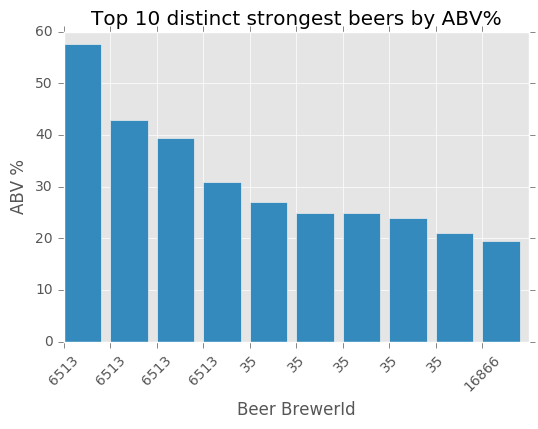

In [17]:
plt.bar(index, abv)
plt.xticks(index, brewer_Id, fontsize=10, rotation=45)
plt.xlabel('Beer BrewerId')
plt.ylabel('ABV %')
plt.title('Top 10 distinct strongest beers by ABV%')
plt.show()

*From this graph, we can see that Brewery with ID 6513 produces the 4 strongest beers by ABV%.*

Group all beers by brewery-id and then beer-id, so we have each brewery's beer collection. The mean column shows mean  ABV value for each beer.


In [18]:
df_abv = df.groupby(['beer_brewerId','beer_beerId']).agg({'beer_ABV' : [np.mean]})
df_abv.head()

beer_ABV
                              mean
beer_brewerId beer_beerId         
1             429              4.4
              5916             5.0
              14348            5.0
              19099            4.2
              19123            4.1

We can calculate overall mean of ABV for each brewery. 

In [19]:
df_abv_mean = df_abv.groupby(level = 'beer_brewerId').mean()
df_abv_mean.head()

,beer_ABV
,mean
beer_brewerId,
1,4.876923
2,0.000000
3,3.723881
5,2.418750
10,4.625000


In [20]:
df_abv_mean.columns = ['mean_beer_ABV']
df_abv_mean.reset_index(inplace = True)

Sorting the data by mean beer ABV% gives top breweries.

In [21]:
df_abv_mean.sort_values('mean_beer_ABV', ascending = False, inplace = True)
df_abv_mean.head(5)

,beer_brewerId,mean_beer_ABV
784,6513,24.690000
1644,24215,12.466667
663,5040,11.500000
1443,19362,11.000000
112,517,10.500000


Plot the graph to compare top breweries by their Mean ABV%.

In [22]:
index = np.arange(10)
brewer_Id = df_abv_mean.head(10)['beer_brewerId']
mean_abv = df_abv_mean.head(10)['mean_beer_ABV']

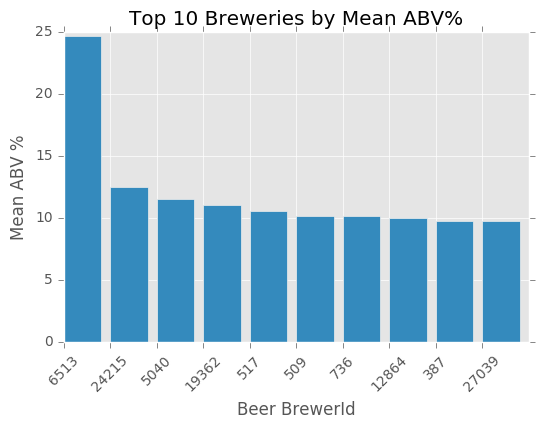

In [23]:
plt.bar(index, mean_abv)
plt.xticks(index, brewer_Id, fontsize=10, rotation=45)
plt.xlabel('Beer BrewerId')
plt.ylabel('Mean ABV %')
plt.title('Top 10 Breweries by Mean ABV%')
plt.show()

*From this graph, we can see that Brewery with ID 6513 produces the strongest beers by their mean ABV%.*

***Conclusion : Brewery # 6513 produces the strongest beers by ABV%.***

***

## 2. If you had to pick 3 beers to recommend using only this data, which would you pick?

In this dataset, 'review-overall' must be the important feature to rank overall quality of beers. Analyzing this feature can povide us with top picks. <br>Follwoing are the approaches.
 - Comparing average review for each beer gives top rated beers(Quality).
 - Comparing total number of reviews for each beer gives more times rated popular beers(Popularity).

Check unique values for overall review.

In [24]:
df.review_overall.unique()

array([ 1.5,  3. ,  4. ,  3.5,  4.5,  5. ,  2. ,  2.5,  1. ,  0. ])

Group all beers by id and name, and then compute number of overall reviews and avg review per beer.

In [25]:
df_review = df.groupby(['beer_beerId','beer_name'])['review_overall'].agg(['count','mean']).reset_index()

In [26]:
df_review.columns = ['beer_beerId','beer_name','review_count','review_mean']

In [27]:
df_review.describe()

,beer_beerId,review_count,review_mean
count,20200.000000,20200.000000,20200.000000
mean,39720.080990,26.181683,3.651862
std,22621.433795,123.799950,0.631129
min,3.000000,1.000000,1.000000
25%,19925.750000,1.000000,3.399774
50%,40712.500000,2.000000,3.750000
75%,59531.250000,7.000000,4.000000
max,77310.000000,3000.000000,5.000000


We have a collection of 20200 distinct beers. Average number of reviews per beer is 26 and average rating is 3.6. <br>We will only consider beers with reviews more than 26 and avg rating more than 4.0 for a more accurate recommendation.
<br><br>After excluding beers with less avg rating, sorting the data by number of reviews provides us with most popular beers. 

In [28]:
mean_threshold = 4.0
df_review_top_count = df_review[df_review.review_mean > mean_threshold].sort_values('review_count',ascending= False)

In [29]:
df_review_top_count.head(3)

,beer_beerId,beer_name,review_count,review_mean
468,1904,Sierra Nevada Celebration Ale,3000,4.168667
74,276,Sierra Nevada Pale Ale,2587,4.245845
3003,11757,Founders Breakfast Stout,2502,4.354516


Plot the graph to see the relation between review count and mean. 

<IPython.core.display.Javascript object>


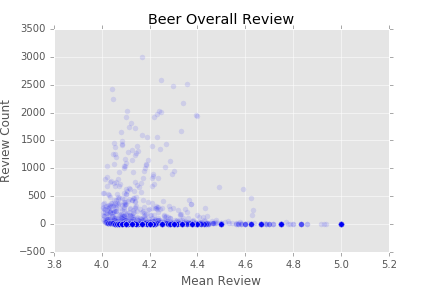

In [51]:
x = df_review_top_count.review_mean
y = df_review_top_count.review_count

%matplotlib notebook
# Create subplots and annotations
fig, ax = plt.subplots()
fig = plt.scatter(x, y, s=30, alpha=0.1)
plt.title('Beer Overall Review')
plt.xlabel('Mean Review')
plt.ylabel('Review Count')

We can say that all the most popular beers have an avg review above the mean 3.65.  The points with mean review > 4.6 also seem to be considerate for recommendation. After excluding beers with number of reviews less than threshold, and sorting the data by mean review provides us with high quality beers.

In [31]:
count_threshold = 26
df_review_top_mean = df_review[df_review.review_count > count_threshold].sort_values('review_mean',ascending= False)

In [32]:
df_review_top_mean.head(3)

,beer_beerId,beer_name,review_count,review_mean
2282,8626,Southampton Berliner Weisse,41,4.768293
14236,56082,Citra DIPA,252,4.630952
8983,36316,Cantillon Blåbær Lambik,156,4.628205


<IPython.core.display.Javascript object>


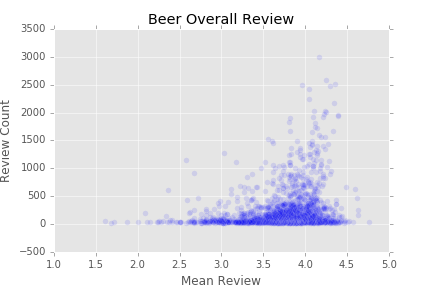

In [33]:
x = df_review_top_mean.review_mean
y = df_review_top_mean.review_count

%matplotlib notebook
# Create subplots and annotations
fig, ax = plt.subplots()
fig = plt.scatter(x, y, s=30, alpha=0.1)
plt.title('Beer Overall Review')
plt.xlabel('Mean Review')
plt.ylabel('Review Count')

*Thus, we have covered all the interesting points in top right and bottom right corner of the graph. *

***Conclusion: ***<br>   ***Top 3 beers based on popularity*** - *Sierra Nevada Celebration Ale, Sierra Nevada Pale Ale, Founders Breakfast Stout* <br>    ***Top 3 beers based on quality*** - *Southampton Berliner Weisse, Citra DIPA,  	Cantillon Blåbær Lambik*


***

## 3. Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

In this case, we need to apply feature selection techniques to determine most important features in a dataset. We have beer reviews based on all these factors. Comparing them with an overall review can give us insight on their importance.

 We can compute mean review per category for each beer for further analysis. 

In [56]:
df_all_mean_review = df.groupby('beer_beerId').agg({'review_overall':'mean','review_aroma':'mean',
                                        'review_taste':'mean','review_appearance':'mean','review_palate':'mean'})
df_all_mean_review.head()

,review_palate,review_appearance,review_aroma,review_overall,review_taste
beer_beerId,,,,,
3,4.166667,3.833333,4.000000,4.166667,4.166667
4,3.700000,3.950000,3.800000,3.700000,3.450000
5,3.318396,3.485849,3.205189,3.549528,3.340802
6,3.513113,3.836374,3.515964,3.706956,3.645382
7,3.106980,3.251138,3.179059,3.266313,3.101669


We do not need beer id for this analysis. Drop and reset indexes of dataframe, rename columns.

In [57]:
df_all_mean_review.reset_index(inplace= True)
df_all_mean_review.drop('beer_beerId', axis = 1, inplace = True)

In [58]:
df_all_mean_review.columns = ['Palate','Appearance','Aroma','Overall','Taste']
df_all_mean_review.head()

,Palate,Appearance,Aroma,Overall,Taste
0,4.166667,3.833333,4.000000,4.166667,4.166667
1,3.700000,3.950000,3.800000,3.700000,3.450000
2,3.318396,3.485849,3.205189,3.549528,3.340802
3,3.513113,3.836374,3.515964,3.706956,3.645382
4,3.106980,3.251138,3.179059,3.266313,3.101669


As input features and target features are continuous, we can apply below techniques to determine most influential factor with high correlation
.

###  Pearson's Correlation

Features with high correlation value are the most important to predict overall quality of a beer. 

In [59]:
corr_vals = df_all_mean_review.corr()
corr_vals

,Palate,Appearance,Aroma,Overall,Taste
Palate,1.000000,0.659598,0.736896,0.809601,0.821956
Appearance,0.659598,1.000000,0.647649,0.614839,0.637400
Aroma,0.736896,0.647649,1.000000,0.747198,0.813106
Overall,0.809601,0.614839,0.747198,1.000000,0.873737
Taste,0.821956,0.637400,0.813106,0.873737,1.000000


Plotting heatmap helps in visualize corr values.

<IPython.core.display.Javascript object>


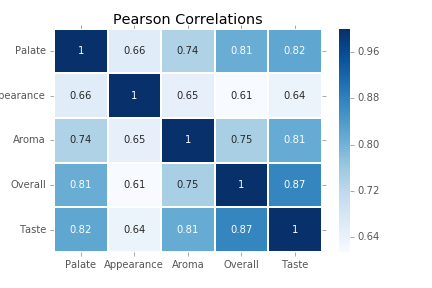

In [60]:
plt.figure()
sns.heatmap(corr_vals,annot=True, linewidth=1, cmap="Blues")
plt.title("Pearson Correlations")
plt.show()

From the heatmap, Taste has highest corr value 0.87 and then Palate has 0.81.

*Hence, we can say that "Taste" is the most important factor in determining overall quality of a beer followed by "Palate".*

### L1-based feature selection

We can apply linear model with L1 regularizer, Lasso for regression. Standardization is a common requirement for this algorithm.

In [39]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [61]:
x = df_all_mean_review[['Palate','Appearance','Aroma','Taste']]
y = df_all_mean_review['Overall']
y = y.astype('int')

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [63]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
lasso.coef_

array([ 0.1268434 ,  0.        ,  0.        ,  0.35208607])

In [65]:
print(list(zip(lasso.coef_, ['Palate','Appearance','Aroma','Taste'])))

[(0.12684339709303502, 'Palate'), (0.0, 'Appearance'), (0.0, 'Aroma'), (0.35208606905968065, 'Taste')]


*The two non-zero coefficients denotes important features Taste and Palate. *

### Tree-based feature selection

Tree-based estimators (forest of trees in the sklearn.ensemble module) can be used to compute feature importances.

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [67]:
clf = ExtraTreesClassifier(n_estimators=50)

In [68]:
clf = clf.fit(x, y)

In [69]:
clf.feature_importances_ 

array([ 0.24873422,  0.12997422,  0.19805598,  0.42323558])

*This array shows features in descending order of importance: Taste, Palate, Aroma and Appearance. Which in turn points "Taste" as the most important feature.*

### Scatter plot with Regression

Finally, we plot linear regression to verify results drwan from above methods. 

In [70]:
from numpy.polynomial.polynomial import polyfit

<IPython.core.display.Javascript object>


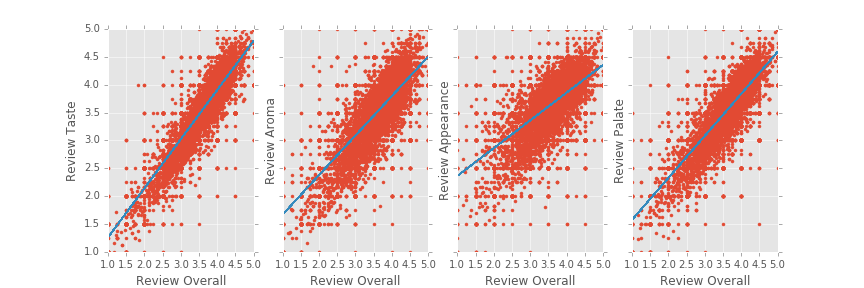

In [71]:
x = df_all_mean_review.Overall
y = df_all_mean_review.Taste
# Create subplots and annotations
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey = True, figsize=(12,4))
b, m = polyfit(x,y,1)
ax1.plot(x, y, '.')
ax1.plot(x, b + m * x, '-')
ax1.set_xlabel('Review Overall')
ax1.set_ylabel('Review Taste')

x = df_all_mean_review.Overall
y = df_all_mean_review.Aroma
b, m = polyfit(x,y,1)
ax2.plot(x, y, '.')
ax2.plot(x, b + m * x, '-')
ax2.set_xlabel('Review Overall')
ax2.set_ylabel('Review Aroma')

x = df_all_mean_review.Overall
y = df_all_mean_review.Appearance
b, m = polyfit(x,y,1)
ax3.plot(x, y, '.')
ax3.plot(x, b + m * x, '-')
ax3.set_xlabel('Review Overall')
ax3.set_ylabel('Review Appearance')

x = df_all_mean_review.Overall
y = df_all_mean_review.Palate
b, m = polyfit(x,y,1)
ax4.plot(x, y, '.')
ax4.plot(x, b + m * x, '-')
ax4.set_xlabel('Review Overall')
ax4.set_ylabel('Review Palate')

*The first and last plot look more fit to regression line. *

***Conclusion: Of all the factors, important factors to determine overall quality of a beer are : 1.Taste and 2.Palate***